HW1


In [2]:
import numpy as np
import matplotlib
import random
from math import *
from pylab import *

def Htrue(x):
    return cos(2*pi*x)

def wi():
    return numpy.random.normal(0,0.01) 

def yi(x):
    return Htrue(x) + wi(); 


In [77]:
def sumPow(arr,n):
    count = 0
    for i in arr:
        count += pow(i,n)
    return count


def xArray(Xi,n):
    X = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            X[i][j] = sumPow(Xi,i+j)
    return np.array(X)


array([[10.        ,  6.02877257,  4.42433217,  3.57050438],
       [ 6.02877257,  4.42433217,  3.57050438,  3.03569044],
       [ 4.42433217,  3.57050438,  3.03569044,  2.66355931],
       [ 3.57050438,  3.03569044,  2.66355931,  2.3852015 ]])

In [316]:
def ySumPow(arr,arr2,n):
    count = 0
    for i in range(len(arr)):
        count += pow(arr[i],n)*arr2[i]
    return count


def yArray(Xi,Yi,n):
    Y = [[0] for _ in range(n)]
    for i in range(n):
        Y[i][0] = ySumPow(Xi,Yi,i)
    return np.array(Y)


In [79]:
def compYi(res,Xi):
    compY = [0 for _ in range(len(Xi))]
    for i in range(len(Xi)):
        for j in range(len(res)):
            compY[i] += pow(Xi[i],j)*res[j][0];
    return compY


In [5]:
plot(Xi,compY)

exampleX = [0 for _ in range(len(Xi))]
for i in range(len(exampleX)):
    exampleX[i] = Xi[i]*2*pi

plot(Xi,np.cos(exampleX))

NameError: name 'Xi' is not defined

In [439]:
Xi =[uniform(0,1) for _ in range(20)]
Xi.sort()
print(Xi)
Test_Xi =[uniform(0,1) for _ in range(100)]
Test_Xi.sort()

[0.001540093177898938, 0.022842494051287465, 0.023789663836763397, 0.028348721875579797, 0.06306347603101858, 0.13245078338050353, 0.1802091767427182, 0.19424975156740854, 0.22248927562579135, 0.40452132734062307, 0.42542731358988495, 0.522188168805324, 0.5364142141222829, 0.63634004225514, 0.6469829503191874, 0.714867759380575, 0.813636373387437, 0.823696179835716, 0.874880651498501, 0.8980691255300098]


In [440]:
Yi = [yi(Xi[i]) for i in range(20)]
Yi

[0.9809614348650864,
 0.991974638579309,
 0.9830648791323456,
 0.9895198283105743,
 0.914365782221486,
 0.680274085328129,
 0.4162386762266597,
 0.32897538622566397,
 0.16945423900847986,
 -0.8087679921581413,
 -0.9039032250494459,
 -0.9748820315125798,
 -0.9906314312511822,
 -0.6615521495489082,
 -0.6246947151537317,
 -0.21763010352479548,
 0.37682148167939566,
 0.43715248005884405,
 0.707660869030937,
 0.7948222449798854]

In [441]:
def leastSquareFit(Xi,Yi,n):
    # First term 
    X = xArray(Xi,n)
    # Second term
    Y = yArray(Xi,Yi,n)
    # Compute coefficent with num of degree n
    inv = np.linalg.inv(X)
    res = inv.dot(Y)
    # Get Y points by fitting function
    compY = compYi(res,Xi)
    
    # Offical fit algorithm
    reg = list(np.polyfit(Xi,Yi,n-1))
    reg.reverse()
    reg = np.array(reg)
    reg.resize((len(reg),1))
    regY = compYi(reg,Xi)
    
    #Test Error
    Test_X = xArray(Test_Xi,n)
    Test_Y = yArray(Test_Xi,[yi(Test_Xi[i]) for i in range(100)],n)
    test_inv = np.linalg.inv(Test_X)
    test_res = test_inv.dot(Test_Y)
    test_compY = compYi(test_res,Test_Xi)
    
    # Get Y true points and error
    exampleX = [0 for _ in range(len(Xi))]
    trainingError = 0
    testError = 0
    for i in range(len(exampleX)):
        exampleX[i] = Xi[i]*2*pi
        trainingError += pow(np.cos(exampleX[i]) - compY[i],2)
    for i in range(100):
        testError += pow(np.cos(2*pi*Test_Xi[i]) - test_compY[i],2)
    # Draw line
    plot(Xi,regY,label="offical polyfit function")
    
    draw_x = np.linspace(0.0, 1.0, 1000)
    plot(draw_x,np.cos(2*pi*draw_x),label="cos 2 pi x")
    plot(Xi,compY,label="degree of " + str(n))
    legend(loc='upper left')
    print("the coefficient of fitting with degree of " + str(n-1) + " is :" )
    print(res)
    print("the training error is "+ str(trainingError))
    print("the test error is "+ str(testError))

the coefficient of fitting with degree of 10 is :
[[ 9.79101757e-01]
 [ 1.65117949e+00]
 [-6.68939409e+01]
 [ 6.26217087e+02]
 [-4.43818628e+03]
 [ 1.89230688e+04]
 [-4.85599961e+04]
 [ 7.66088770e+04]
 [-7.28134707e+04]
 [ 3.82313906e+04]
 [-8.51447412e+03]]
the training error is 0.0013216669102674543
the test error is 0.0011086703340466996


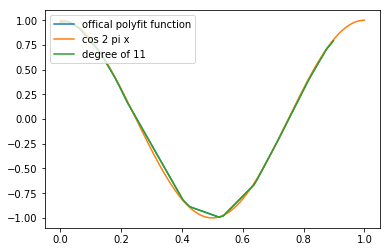

In [452]:
leastSquareFit(Xi,Yi,11)

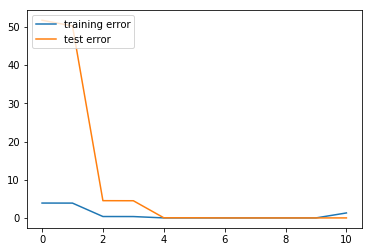

In [438]:
x = [0,1,2,3,4,5,6,7,8,9,10]
train = [3.8904219344720072,3.878092080662361,0.3655394837095259,0.35680898051707277,0.002883104221433988,0.002243961516050272,0.00022967687858516163, 0.000249969682197783,0.00032180974319763754,0.00040670725798459177,1.3002783496355566 ]
test = [51.74454293077419,50.25193668863816,4.513113579005623, 4.495893336993241,0.034833123799525065,0.03496405285779574, 0.0007599882978944738,0.0005136458631709001,0.0005767847046697304,0.0012467640079042272,0.001163685478535301]

plot(x,train,label="training error")
plot(x,test,label="test error")
legend(loc='upper left')

In [4]:
np.mat(np.zeros([10, 10 + 1])).T

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])